# Data Analysis/Cleaning

In [ ]:
# install required libraries 
!pip install pandas==0.25.1
!pip install numpy==1.17.3
!pip install matplotlib==3.1.2
!pip install seaborn==0.10.0

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore') 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = (10, 10)

In [3]:
# Reading the csv files
dfbooks=pd.read_csv('../data/raw/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
dfbooks.columns = ['ISBN', 'title', 'author', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']
dfusers=pd.read_csv('../data/raw/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
dfusers.columns = ['userID', 'location', 'age']
dfratings= pd.read_csv('../data/raw/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
dfratings.columns = ['userID', 'ISBN', 'rating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [4]:
# view the 5 random records from a books dataframe to see how the data is 
dfbooks.sample(5)

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
68212,0802491618,Women Leaving the Workplace: How to Make the T...,Larry Burkett,1995,Moody Pr,http://images.amazon.com/images/P/0802491618.0...,http://images.amazon.com/images/P/0802491618.0...,http://images.amazon.com/images/P/0802491618.0...
133444,1556617313,Red Sky in Mourning: Helen Bradley Mysteries (...,Patricia H. Rushford,1997,Bethany House Publishers,http://images.amazon.com/images/P/1556617313.0...,http://images.amazon.com/images/P/1556617313.0...,http://images.amazon.com/images/P/1556617313.0...
193511,0816022186,The Cultural Atlas of Mesopotamia and the Anci...,Michael Roaf,1990,Facts on File,http://images.amazon.com/images/P/0816022186.0...,http://images.amazon.com/images/P/0816022186.0...,http://images.amazon.com/images/P/0816022186.0...
181440,0571147267,Selling Hitler,Robert Harris,0,Faber Faber Inc,http://images.amazon.com/images/P/0571147267.0...,http://images.amazon.com/images/P/0571147267.0...,http://images.amazon.com/images/P/0571147267.0...
246030,039444826X,Tent of miracles,Jorge Amado,1971,Knopf,http://images.amazon.com/images/P/039444826X.0...,http://images.amazon.com/images/P/039444826X.0...,http://images.amazon.com/images/P/039444826X.0...


In [5]:
# view the 5 random records from a ratings dataframe to see how the data is 
dfratings.sample(5)

,userID,ISBN,rating
1045467,250163,0743411218,0
465320,110973,0965605914,9
906439,219973,880639990X,10
332568,78973,0375504613,7
91827,20427,3150000734,9


In [6]:
# view the 5 random records from a users dataframe to see how the data is 
dfusers.sample(5)

,userID,location,age
40529,40530,"philadelphia, pennsylvania, usa",37.0
132633,132634,"mieres, asturies, spain",27.0
173375,173376,"atlanta, georgia, usa",NaN
138270,138271,"indianapolis, indiana, usa",NaN
55773,55774,"carp, ontario, canada",NaN


In [7]:
# viewing the shapes of the different datasets
print(dfbooks.shape)
print(dfusers.shape)
print(dfratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


## Users Dataset

In [8]:
# viewing columns in Users dataframe
dfusers.columns

Index(['userID', 'location', 'age'], dtype='object')

In [9]:
# checks details for users dataframe using info()
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
location    278858 non-null object
age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [10]:
# Viewing a description of all columns of Users dataframe  
dfusers.describe(include='all')

,userID,location,age
count,278858.00000,278858,168096.000000
unique,NaN,57339,NaN
top,NaN,"london, england, united kingdom",NaN
freq,NaN,2506,NaN
mean,139429.50000,NaN,34.751434
std,80499.51502,NaN,14.428097
min,1.00000,NaN,0.000000
25%,69715.25000,NaN,24.000000
50%,139429.50000,NaN,32.000000
75%,209143.75000,NaN,44.000000


In [11]:
# viewing count of records in each column
dfusers.count()

userID      278858
location    278858
age         168096
dtype: int64

In [12]:
# Checking for any missing values
dfusers.isnull().sum()

userID           0
location         0
age         110762
dtype: int64

In [13]:
# Checking for any duplicates
dfusers.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
278853    False
278854    False
278855    False
278856    False
278857    False
Length: 278858, dtype: bool

##### Handling outliers with age column

In [14]:
# checking unique sorted values in the Age column
print(sorted(dfusers.age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

If we inspect closely the results,there is a discovery of data entries that are invalid like for example 0, ages less than 10 (I believe 10 will be a perfect age for child to probably rate books) and nan including bigger numbers more than 100 like 220 etc and we all know that all those are ridiculous numbers for age.

Next, I will handle the invalid entries as follows: I will set the age values that are less than 10 and values that are more than 100 to NaN.

In [15]:
# Setting the invalid age entries to NaN

dfusers.loc[(dfusers.age < 10), 'age'] = np.nan
dfusers.loc[(dfusers.age > 100), 'age'] = np.nan
dfusers.head()

,userID,location,age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


To change the age column to int datatype, we will have to convert to convert NaNs to number values so in this case we use the mean of age column to replace them with.

In [16]:
# We replace the NaN with mean Age values
dfusers.age = dfusers.age.fillna(dfusers.age.mean())
dfusers.head()

,userID,location,age
0,1,"nyc, new york, usa",34.777122
1,2,"stockton, california, usa",18.000000
2,3,"moscow, yukon territory, russia",34.777122
3,4,"porto, v.n.gaia, portugal",17.000000
4,5,"farnborough, hants, united kingdom",34.777122


We can see the mean value is 34 which I believe is fairly a good age.

In [17]:
# Confirming if there are no NaNs present
dfusers.age.isnull().sum()

0

Finally we convert our Age column to Int.

In [18]:
# converting data type from float to int
dfusers.age = dfusers.age.astype(np.int32)
dfusers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
location    278858 non-null object
age         278858 non-null int32
dtypes: int32(1), int64(1), object(1)
memory usage: 5.3+ MB


In [19]:
# Splitting the Location column to city, state and country
user_location_split = dfusers.location.str.split(',', 2, expand=True)
user_location_split.columns = ['city', 'state', 'country']
dfusers = dfusers.join(user_location_split)

In [20]:
# get a list of top cities with users who rated
cities_most_users = dfusers.city.value_counts()[:10]
print('List of 10 cities with the most users who rated are:' ,cities_most_users)

List of 10 cities with the most users who rated are: london       4105
barcelona    2664
toronto      2342
madrid       1933
sydney       1884
portland     1869
melbourne    1863
vancouver    1699
chicago      1566
seattle      1541
Name: city, dtype: int64


In [21]:
# Let's drop the column Location, city and state from users, keeping the country column
dfusers.drop(columns=['location','city','state'], inplace=True)
dfusers.sample(5)

,userID,age,country
164743,164744,32,france
243455,243456,35,spain
46323,46324,34,usa
206408,206409,34,burkina faso
127287,127288,26,united kingdom


We can see the location has now been split among city, state and country

In [22]:
# display unique results from country column
dfusers.country.unique()

array([' usa', ' russia', ' portugal', ..., ' la svizzera', ' hernando',
       ' united kingdom.'], dtype=object)

In [23]:
# correcting some country names, like for example la svizzera is Switzerland  
dfusers.loc[dfusers.country == ' la svizzera',:]

,userID,age,country
278114,278115,34,la svizzera


In [24]:
#fixing the incorrect data in country columns for
dfusers.loc[dfusers.country == 278115,'userID'] = "switzerland"
dfusers.loc[dfusers.country  == 278115,:]

,userID,age,country


In [25]:
dfusers = dfusers.dropna(how='any',axis=0) 

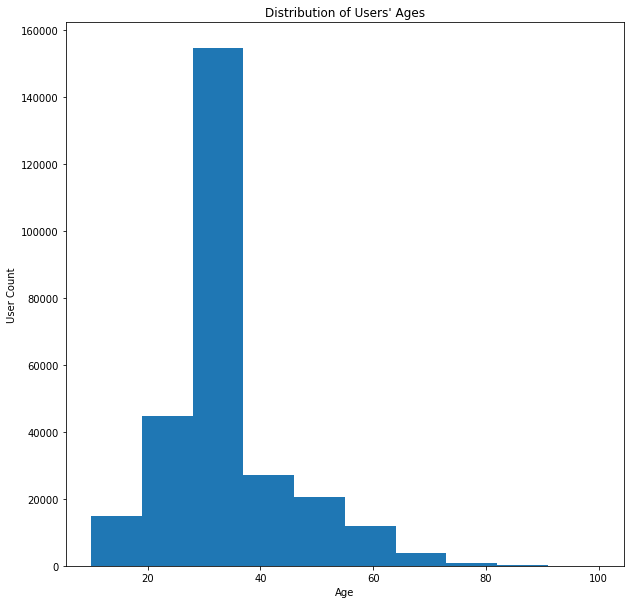

In [26]:
# Plot for Age distribution of users
dfusers.age.plot.hist(bins=10)
plt.title("Distribution of Users' Ages")
plt.ylabel('User Count')
plt.xlabel('Age');


We can observe that majority of the users that rate the books are mostly around 30 years of age, followed by users in their 20's.  

## Books Dataset

In [27]:
# viewing columns in Books dataframe
dfbooks.columns

Index(['ISBN', 'title', 'author', 'yearOfPublication', 'publisher',
       'imageUrlS', 'imageUrlM', 'imageUrlL'],
      dtype='object')

In [28]:
# Viewing a description of  all columns of books dataframe 
dfbooks.describe(include='all')

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
count,271360,271360,271359,271360,271358,271360,271360,271357
unique,271360,242135,102023,202,16807,271044,271044,271041
top,0553288636,Selected Poems,Agatha Christie,2002,Harlequin,http://images.amazon.com/images/P/014027944X.0...,http://images.amazon.com/images/P/091594359X.0...,http://images.amazon.com/images/P/042519597X.0...
freq,1,27,632,13903,7535,2,2,2


In [29]:
# Checking for any duplicates
dfbooks.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
271355    False
271356    False
271357    False
271358    False
271359    False
Length: 271360, dtype: bool

In [30]:
# Checking for any missing values
dfbooks.isnull().sum()

ISBN                 0
title                0
author               1
yearOfPublication    0
publisher            2
imageUrlS            0
imageUrlM            0
imageUrlL            3
dtype: int64

We can observe that we have missing values in 3 columns: Author, Publisher,and ImageUrlL 

In [31]:
# Total number of missing values
dfbooks.isnull().sum().sum()

6

Here we can see that there are missing values in some columns, this could be because of NAN values present or no values at all

In [32]:
# counting the number of records in each column
dfbooks.count()

ISBN                 271360
title                271360
author               271359
yearOfPublication    271360
publisher            271358
imageUrlS            271360
imageUrlM            271360
imageUrlL            271357
dtype: int64

We can see that the total count of the missing values in the books dataframe

In [33]:
# viewing details of dataframe using info()
dfbooks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
title                271360 non-null object
author               271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


We can see that the column:yearOfPublication is of object dataype of which it was supposed to be of int datatype, let's further inspect the data in the columns

Let's further view the data present in the yearOfPublication column

In [34]:
# checking unique values of yearOfPublication 
dfbooks.yearOfPublication.unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

We can observe that some data is not entirely year, but some entries that are words instead of year values.

In [35]:
# Let's investigate further in the yearOfPublicationthe column, the row(s) that have "Gallimard" 
dfbooks.loc[dfbooks.yearOfPublication == 'Gallimard',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [36]:
# Let's investigate further in the yearOfPublicationthe column, the row(s) that have "DK Publishing Inc" 
dfbooks.loc[dfbooks.yearOfPublication == 'DK Publishing Inc',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


From the results, you can observe that it seems like for some reason there was a mixup with loaded data and Author details are in the Title column,while the Author column contains the values for the year.

In [37]:
# fixing the incorrect data in Title, Author, yearOfPublication and Publisher columns for Gallimard
dfbooks.loc[dfbooks.ISBN == '2070426769','yearOfPublication'] = 2003
# searched the correct spelling of the Author changed from 'Jean-Marie Gustave Le ClÃ?Â©zio' to 'Jean-Marie Gustave Le Clézio' 
dfbooks.loc[dfbooks.ISBN == '2070426769','author'] = "Jean-Marie Gustave Le Clézio"
dfbooks.loc[dfbooks.ISBN == '2070426769','publisher'] = "Gallimard"
dfbooks.loc[dfbooks.ISBN == '2070426769','title'] = "Peuple du ciel, suivi de 'Les Bergers"
dfbooks.loc[dfbooks.ISBN== '2070426769',:]



,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers",Jean-Marie Gustave Le Clézio,2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN


In [38]:
# fixing the incorrect data in Title, Author, yearOfPublication and Publisher columns for DK Publishing Inc with ISBN =0789466953
dfbooks.loc[dfbooks.ISBN == '0789466953','yearOfPublication'] = 2000
dfbooks.loc[dfbooks.ISBN == '0789466953','author'] = "James Buckley"
dfbooks.loc[dfbooks.ISBN == '0789466953','publisher'] = "DK Publishing Inc"
dfbooks.loc[dfbooks.ISBN == '0789466953','title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)"
dfbooks.loc[dfbooks.ISBN == '0789466953',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",James Buckley,2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [39]:
# fixing the incorrect data in Title, Author, yearOfPublication and Publisher columns for DK Publishing Inc with ISBN = 078946697X
dfbooks.loc[dfbooks.ISBN == '078946697X','yearOfPublication'] = 2000
dfbooks.loc[dfbooks.ISBN == '078946697X','author'] = "Michael Teitelbaum"
dfbooks.loc[dfbooks.ISBN == '078946697X','publisher'] = "DK Publishing Inc"
dfbooks.loc[dfbooks.ISBN == '078946697X','title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)"
dfbooks.loc[dfbooks.ISBN == '078946697X',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",Michael Teitelbaum,2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN


In [40]:
 # Let's investigate further in the yearOfPublicationthe column, the row(s) that have "Gallimard" 
dfbooks.loc[dfbooks.author == 'Ã?Â?ric Holder',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
33914,2290048763,Mademoiselle Chambon,Ã?Â?ric Holder,1998,J'ai lu,http://images.amazon.com/images/P/2290048763.0...,http://images.amazon.com/images/P/2290048763.0...,http://images.amazon.com/images/P/2290048763.0...


In [41]:
# fixing the incorrect data in  Author, and Publisher for Mademoiselle Chambon book
# searched the correct spelling of the Author changed from Ã?Â?ric Holder to  Éric Holder 
dfbooks.loc[dfbooks.ISBN == '2290048763','author'] = "Éric Holder"
dfbooks.loc[dfbooks.ISBN== '2290048763',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
33914,2290048763,Mademoiselle Chambon,Éric Holder,1998,J'ai lu,http://images.amazon.com/images/P/2290048763.0...,http://images.amazon.com/images/P/2290048763.0...,http://images.amazon.com/images/P/2290048763.0...


In [42]:
 # Let's investigate further in the yearOfPublicationthe column, the row(s) that have "Gallimard" 
dfbooks.loc[dfbooks.publisher == 'Ã?Â¶bv&amp;hpt',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
201227,3215020408,Atem und Stimme. Anleitung zum guten Sprechen.,Horst Coblenzer,2002,Ã?Â¶bv&amp;hpt,http://images.amazon.com/images/P/3215020408.0...,http://images.amazon.com/images/P/3215020408.0...,http://images.amazon.com/images/P/3215020408.0...


In [43]:
# fixing the incorrect data in Publisher for book
# searched the correct spelling of the Publisher changed from Ã?Â¶bv&amp;hpt to öbv&hpt 
dfbooks.loc[dfbooks.ISBN == '3215020408','publisher'] = "öbv&hpt"
dfbooks.loc[dfbooks.ISBN== '3215020408',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
201227,3215020408,Atem und Stimme. Anleitung zum guten Sprechen.,Horst Coblenzer,2002,öbv&hpt,http://images.amazon.com/images/P/3215020408.0...,http://images.amazon.com/images/P/3215020408.0...,http://images.amazon.com/images/P/3215020408.0...


In [44]:
# we can see the following book has no publisher
dfbooks.loc[dfbooks.ISBN== '193169656X',:]
dfbooks.loc[dfbooks.ISBN== '1931696993',:]


,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [45]:
# same as this one with the same publisher
dfbooks.loc[dfbooks.ISBN== '1931696993',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [46]:
# lets fix that by adding the publisher
dfbooks.loc[dfbooks.ISBN == '193169656X','publisher'] = "Editions P. Terrail"
dfbooks.loc[dfbooks.ISBN == '1931696993','publisher'] = "Editions P. Terrail"

In [47]:
dfbooks.loc[dfbooks.publisher == 'Editions P. Terrail',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
128890,193169656X,Tyrant Moon,Elaine Corvidae,2002,Editions P. Terrail,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...,http://images.amazon.com/images/P/193169656X.0...
129037,1931696993,Finders Keepers,Linnea Sinclair,2001,Editions P. Terrail,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...,http://images.amazon.com/images/P/1931696993.0...


In [48]:
# authors 
dfbooks["author"].value_counts().sort_values(ascending=False).head(20)

Agatha Christie          632
William Shakespeare      567
Stephen King             524
Ann M. Martin            423
Carolyn Keene            373
Francine Pascal          372
Isaac Asimov             330
Nora Roberts             315
Barbara Cartland         307
Charles Dickens          302
Not Applicable (Na )     286
R. L. Stine              282
Mark Twain               231
Jane Austen              223
Terry Pratchett          220
Mary Higgins Clark       218
Piers Anthony            217
Marion Zimmer Bradley    216
Janet Dailey             214
Franklin W. Dixon        204
Name: author, dtype: int64

In [49]:
# we can see there is a list of books with auhtor not aplicable 
dfbooks.loc[dfbooks.author == 'Not Applicable (Na )',:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
10821,068985918X,"\Once More, With Feeling\"" : The Script Book""",Not Applicable (Na ),2002,Simon Spotlight Entertainment,http://images.amazon.com/images/P/068985918X.0...,http://images.amazon.com/images/P/068985918X.0...,http://images.amazon.com/images/P/068985918X.0...
12483,0752271474,Purple Ronnie's Love Poems,Not Applicable (Na ),2003,"Boxtree, Limited",http://images.amazon.com/images/P/0752271474.0...,http://images.amazon.com/images/P/0752271474.0...,http://images.amazon.com/images/P/0752271474.0...
14045,0881762024,Campbell's Creative Cooking With Soup: Over 19...,Not Applicable (Na ),1990,Publications Intl,http://images.amazon.com/images/P/0881762024.0...,http://images.amazon.com/images/P/0881762024.0...,http://images.amazon.com/images/P/0881762024.0...
18533,0721401023,"Book of Trees (Nature, Series 536)",Not Applicable (Na ),1986,Ladybird Books Ltd,http://images.amazon.com/images/P/0721401023.0...,http://images.amazon.com/images/P/0721401023.0...,http://images.amazon.com/images/P/0721401023.0...
18614,1566475961,Na Wahine: Hawaiin Proverbs &amp; Inspirationa...,Not Applicable (Na ),2003,Booklines Hawaii Ltd,http://images.amazon.com/images/P/1566475961.0...,http://images.amazon.com/images/P/1566475961.0...,http://images.amazon.com/images/P/1566475961.0...
...,...,...,...,...,...,...,...,...
268513,0805401466,Guideposts Best Loved Stories: A Treasury of G...,Not Applicable (Na ),1997,Broadman &amp; Holman Pub,http://images.amazon.com/images/P/0805401466.0...,http://images.amazon.com/images/P/0805401466.0...,http://images.amazon.com/images/P/0805401466.0...
268647,0895773767,Nature in America/Your A to Z Guide to Our Cou...,Not Applicable (Na ),1991,Putnam Pub Group,http://images.amazon.com/images/P/0895773767.0...,http://images.amazon.com/images/P/0895773767.0...,http://images.amazon.com/images/P/0895773767.0...
269175,0812066170,Watercolor (Barron's Art Handbooks: Purple Ser...,Not Applicable (Na ),1996,Barron's Educational Series,http://images.amazon.com/images/P/0812066170.0...,http://images.amazon.com/images/P/0812066170.0...,http://images.amazon.com/images/P/0812066170.0...
270639,0721407714,"Hm the Queen (Famous People, Series 816)",Not Applicable (Na ),1986,Ladybird Books Ltd,http://images.amazon.com/images/P/0721407714.0...,http://images.amazon.com/images/P/0721407714.0...,http://images.amazon.com/images/P/0721407714.0...


In [50]:
# viewing datat in the yearOfPublication column
dfbooks.yearOfPublication

0         2002
1         2001
2         1991
3         1999
4         1999
          ... 
271355    1988
271356    1991
271357    2004
271358    1996
271359    2000
Name: yearOfPublication, Length: 271360, dtype: object

In [51]:
# checking all columns who have a year of publication of value 0
dfbooks.loc[dfbooks.yearOfPublication == 0,:]

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


Let's inspect the data in yearOfPublication once again. We can see value of 0.
We can see that there are incorrect values for since the data was collected in 2004, meaning we are not supposed to be seeing any yearOfPublication data more than 2004 and even worse more than our current year 2019 like 2024. We can already conclude that most of the values in yearOfPublication are incorrect. We will try to correct the dataset by setting invalid values such as 0 and more than 2004 to NaN.

In [52]:
# Changing yearOfPublication column to numeric
dfbooks.yearOfPublication=pd.to_numeric(dfbooks.yearOfPublication, errors='coerce')

In [53]:
# Setting the invalid yearOfPublication entries to NaN
dfbooks.loc[(dfbooks.yearOfPublication == 0), 'yearOfPublication'] = np.nan
dfbooks.loc[(dfbooks.yearOfPublication > 2004), 'yearOfPublication'] = np.nan
dfbooks.yearOfPublication.unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984.,   nan, 1968., 1961., 1958., 1974., 1976., 1971., 1977.,
       1975., 1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966.,
       1920., 1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969.,
       1954., 1950., 1967., 1957., 1940., 1937., 1955., 1946., 1936.,
       1930., 1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926.,
       1938., 1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931.,
       1914., 1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944.,
       1917., 1901., 1908., 1906., 1935., 1806., 1909., 1378., 1919.,
       1922., 1897., 1376.])

In [54]:
# To assign values to NaNs, lets replace using the mean value for the yearOfPublication column
dfbooks.yearOfPublication.fillna(round(dfbooks.yearOfPublication.mean()), inplace=True)
dfbooks.yearOfPublication.unique()

array([2002., 2001., 1991., 1999., 2000., 1993., 1996., 1988., 2004.,
       1998., 1994., 2003., 1997., 1983., 1979., 1995., 1982., 1985.,
       1992., 1986., 1978., 1980., 1952., 1987., 1990., 1981., 1989.,
       1984., 1968., 1961., 1958., 1974., 1976., 1971., 1977., 1975.,
       1965., 1941., 1970., 1962., 1973., 1972., 1960., 1966., 1920.,
       1956., 1959., 1953., 1951., 1942., 1963., 1964., 1969., 1954.,
       1950., 1967., 1957., 1940., 1937., 1955., 1946., 1936., 1930.,
       1925., 1948., 1943., 1947., 1945., 1923., 1939., 1926., 1938.,
       1911., 1904., 1949., 1932., 1928., 1929., 1927., 1931., 1914.,
       1934., 1910., 1933., 1902., 1924., 1921., 1900., 1944., 1917.,
       1901., 1908., 1906., 1935., 1806., 1909., 1378., 1919., 1922.,
       1897., 1376.])

In [55]:
# Confirming if there are no NaNs present
dfbooks.yearOfPublication.isnull().sum()

0

In [56]:
# Converting datatype for yearOfPublication column to int32
dfbooks.yearOfPublication = dfbooks.yearOfPublication.astype(np.int32)
dfbooks.sample(5)

,ISBN,title,author,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
153582,0345357396,Escalation (Gundam Mobile Suit #2),Yoshiuki Tomino,1990,Del Rey Books,http://images.amazon.com/images/P/0345357396.0...,http://images.amazon.com/images/P/0345357396.0...,http://images.amazon.com/images/P/0345357396.0...
111490,1840651059,The Civil War,William C. Davis,1999,Chrysalis Books,http://images.amazon.com/images/P/1840651059.0...,http://images.amazon.com/images/P/1840651059.0...,http://images.amazon.com/images/P/1840651059.0...
224576,0967426804,The Throne of God,Val Smith,1999,SBG Publishing Company,http://images.amazon.com/images/P/0967426804.0...,http://images.amazon.com/images/P/0967426804.0...,http://images.amazon.com/images/P/0967426804.0...
141794,0393975088,Norton Anthology of Short Fiction: Sixth Edition,R. V. Cassill,2000,W.W. Norton &amp; Company,http://images.amazon.com/images/P/0393975088.0...,http://images.amazon.com/images/P/0393975088.0...,http://images.amazon.com/images/P/0393975088.0...
23368,0553277006,Return to Eden (Spectra Series),Harry Harrison,1989,Spectra Books,http://images.amazon.com/images/P/0553277006.0...,http://images.amazon.com/images/P/0553277006.0...,http://images.amazon.com/images/P/0553277006.0...


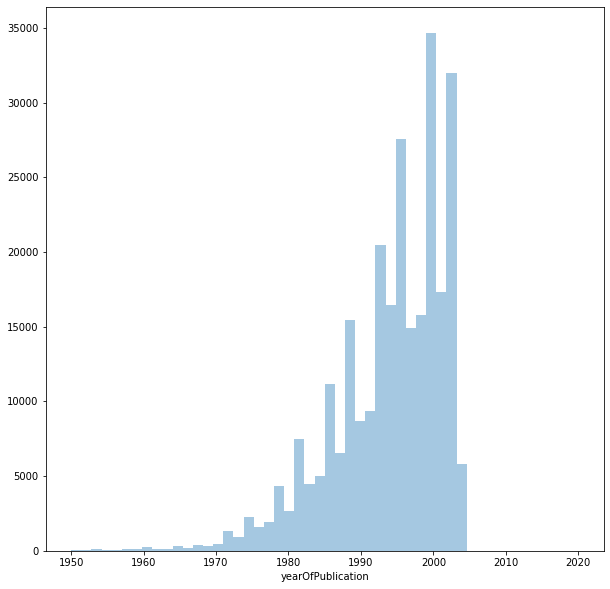

In [57]:
# Plot of Publications by Year

sns.distplot(dfbooks.yearOfPublication, kde=False, hist_kws={"range": [1950,2020]})

We can observe that the dataset contains mostly books that were published between 2000 and 2005

In [58]:
# Let's drop the columns "ImageUrlS" and "ImageUrlM" and  "ImageUrlL"
dfbooks.drop(columns=['imageUrlS', 'imageUrlM', 'imageUrlL'], inplace=True) # drop image-url columns
dfbooks.head()

,ISBN,title,author,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


In [59]:
# Checking that there are no duplicated book entries
uniq_books = dfbooks.ISBN.nunique()
all_books = dfbooks.ISBN.count()
print(f'No. of unique books: {uniq_books} | All book entries: {all_books}')

No. of unique books: 271360 | All book entries: 271360


## Ratings Dataset

In [60]:
# viewing columns in Ratings dataframe
dfratings.columns

Index(['userID', 'ISBN', 'rating'], dtype='object')

In [61]:
# checks details for ratings dataframe using info()
dfratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID    1149780 non-null int64
ISBN      1149780 non-null object
rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [62]:
# viewing count of records in each column
dfratings.count()

userID    1149780
ISBN      1149780
rating    1149780
dtype: int64

In [63]:
# Checking for any missing values
dfratings.isnull().sum()

userID    0
ISBN      0
rating    0
dtype: int64

In [64]:
# Viewing description of all columns of Ratings dataframe  
dfratings.describe(include='all')

,userID,ISBN,rating
count,1.149780e+06,1149780,1.149780e+06
unique,NaN,340556,NaN
top,NaN,0971880107,NaN
freq,NaN,2502,NaN
mean,1.403864e+05,NaN,2.866950e+00
std,8.056228e+04,NaN,3.854184e+00
min,2.000000e+00,NaN,0.000000e+00
25%,7.034500e+04,NaN,0.000000e+00
50%,1.410100e+05,NaN,0.000000e+00
75%,2.110280e+05,NaN,7.000000e+00


In [65]:
# Checking for any duplicates
dfratings.duplicated()

0          False
1          False
2          False
3          False
4          False
           ...  
1149775    False
1149776    False
1149777    False
1149778    False
1149779    False
Length: 1149780, dtype: bool

In [66]:
# Return the list of Books with the lowest rating:
dfratings[dfratings.rating == dfratings.rating.min()]

,userID,ISBN,rating
0,276725,034545104X,0
2,276727,0446520802,0
5,276733,2080674722,0
10,276746,0425115801,0
11,276746,0449006522,0
...,...,...,...
1149769,276704,059032120X,0
1149770,276704,0679752714,0
1149772,276704,080410526X,0
1149774,276704,0876044011,0


In [67]:
# Return the list of Books with the highest rating:
dfratings[dfratings.rating == dfratings.rating.max()]

,userID,ISBN,rating
9,276745,342310538,10
30,276760,8440682697,10
61,276772,3499230933,10
62,276772,3596151465,10
85,276788,055310666X,10
...,...,...,...
1149743,276688,0836218655,10
1149744,276688,0836236688,10
1149745,276688,0892966548,10
1149777,276709,0515107662,10


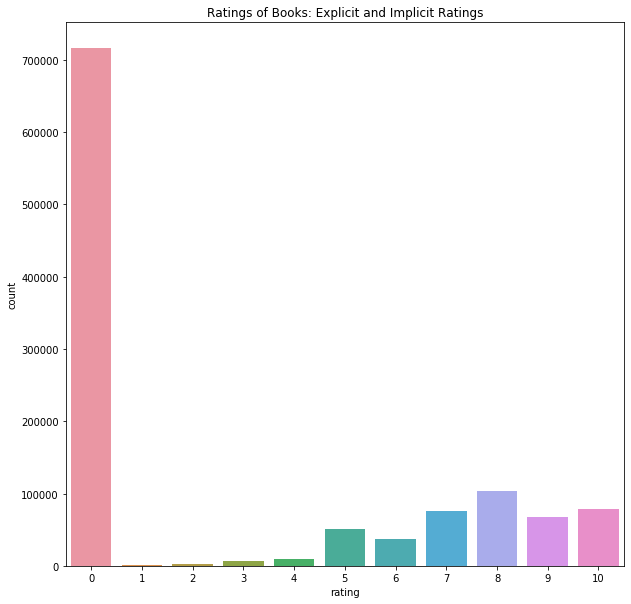

In [68]:
# plotting histogram based on the ratings(explicit and implicit) data set
plt.title('Ratings of Books: Explicit and Implicit Ratings')
sns.countplot(data=dfratings , x='rating')
plt.show()

From the plot we can observe that zero ratings are the most, followed by ratings of 8 and 10. While ratings of 1 are very low. We can see that the ratings of 0 have the most rating and this are actually implicit ratings.

In [69]:
# ratings dataset will have num_users*num_books entries if every user rated every item, this shows that the dataset is very sparse
num_users = dfusers.shape[0]
num_books = dfbooks.shape[0]

In [70]:
#Sparsity of dataset in %
sparsity=1.0-len(dfratings)/float(num_users*num_books)
print(sparsity*100, "%")

99.99848054120955 %


In [71]:
# Because the plan is to work only with the explicit ratings, we will remove the implicit ratings 
explicit_ratings = dfratings[dfratings.rating != 0]

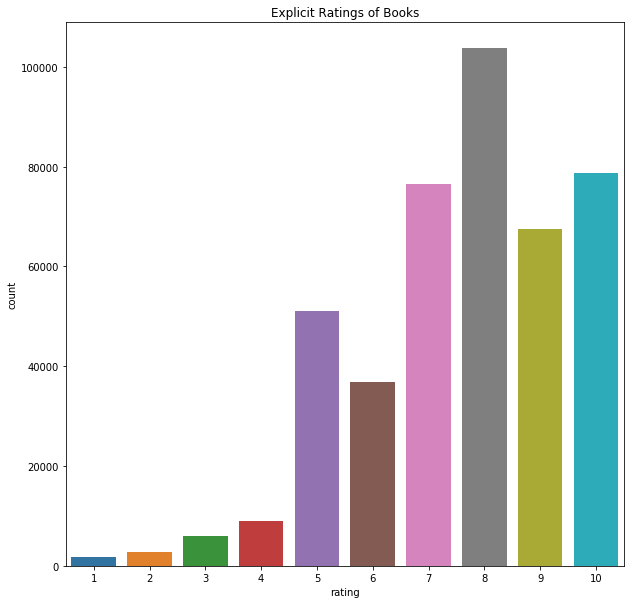

In [72]:
# plotting count based on the ratings 
plt.title('Explicit Ratings of Books')
sns.countplot(data=explicit_ratings , x='rating')
plt.show()
 

We can be observe that users mostly like rating books with higher values, like for example looking at the dataset from rating of 5. We can also see that the rating of 8 has been rated highest number of times

In [73]:
# get average book rating 
print('Average book rating: ', round(explicit_ratings['rating'].mean(), 2))

Average book rating:  7.6


In [74]:
# Count ratings of books by using group by on ISBN and then displaying the Top 10 results from highest rating to lowest
BookRatingsCount = pd.DataFrame(explicit_ratings.groupby('ISBN')['rating'].count())
BookRatingsCount.sort_values('rating', ascending=False).head(10)

,rating
ISBN,
0316666343,707
0971880107,581
0385504209,487
0312195516,383
0679781587,333
0060928336,320
059035342X,313
0142001740,307
0446672211,295


To also try to reduce the dataset size, I am considering users who have rated atleast 200 books
and books which have atleast 200 ratings

In [75]:
# removing users who have rated atleast 200 books and books with atleast 200 ratings
rate_stats1 = explicit_ratings["userID"].value_counts()
explicit_ratings = explicit_ratings[explicit_ratings['userID'].isin(rate_stats1[rate_stats1 >= 200].index)]
rate_stats = explicit_ratings['rating'].value_counts()
explicit_ratings = explicit_ratings[explicit_ratings['rating'].isin(rate_stats[rate_stats >= 200].index)]
explicit_ratings.shape

(69426, 3)

We are able to see the book that has the most ratings is ISBN: 0971880107 with 2502 ratings.

In [76]:
Top10RatedBooks = pd.DataFrame(['0971880107', '0316666343', '0385504209', '0060928336', '0312195516', '044023722X', '0679781587', '0142001740', '067976402X', '0671027360'], index=np.arange(10), columns = ['ISBN'])
Summary_Top10RatedBooks = pd.merge(Top10RatedBooks, dfbooks, on='ISBN')
Summary_Top10RatedBooks.head(10)

,ISBN,title,author,yearOfPublication,publisher
0,0971880107,Wild Animus,Rich Shapero,2004,Too Far
1,0316666343,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
2,0385504209,The Da Vinci Code,Dan Brown,2003,Doubleday
3,0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
4,0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
5,044023722X,A Painted House,John Grisham,2001,Dell Publishing Company
6,0142001740,The Secret Life of Bees,Sue Monk Kidd,2003,Penguin Books
7,067976402X,Snow Falling on Cedars,David Guterson,1995,Vintage Books USA
8,0671027360,Angels &amp; Demons,Dan Brown,2001,Pocket Star


In [77]:
# Merging books and ratings df 
books_ratings_merge = dfratings.join(dfbooks.set_index('ISBN'), on='ISBN')
books_ratings_merge.sample(5)

,userID,ISBN,rating,title,author,yearOfPublication,publisher
814976,198408,2842630521,0,Je l'aimais,Anna Gavalda,2002.0,Le Dilettante
597092,144110,0671702513,6,The Prize,Julie Garwood,1991.0,Pocket
823530,198711,1857923553,0,NaN,NaN,NaN,NaN
1010148,242299,0671001795,0,Two for the Dough,Janet Evanovich,1996.0,Pocket
1106187,265313,0553287737,0,The Bourne Ultimatum,Robert Ludlum,1991.0,Bantam Books


In [78]:
print('Total number of Books with no titles:', books_ratings_merge.title.isnull().sum())

Total number of Books with no titles: 118644


As we can see there seems to be a few books' ISBNs in the ratings table that do not  match with an ISBN in the books dataframe, about 118644 book entries. This probably means that we will have to remove them from the dataset because there is no way we will be able to know the title of those books in order to give a proper a recommendation.

From the sample results we can  observe that the yearOfPublication is showing values with decimals. Lets check the datatypes

In [79]:
# check dataype of columns
books_ratings_merge.dtypes

userID                 int64
ISBN                  object
rating                 int64
title                 object
author                object
yearOfPublication    float64
publisher             object
dtype: object

We can see that the yearOfPublication has datatype float after the merge

In [80]:
books_ratings_merge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 7 columns):
userID               1149780 non-null int64
ISBN                 1149780 non-null object
rating               1149780 non-null int64
title                1031136 non-null object
author               1031135 non-null object
yearOfPublication    1031136 non-null float64
publisher            1031136 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 61.4+ MB


In [81]:
 # removing rows with missing titles
books_ratings_merge.dropna(subset=['title'], inplace=True)
books_ratings_merge.sample(5)

,userID,ISBN,rating,title,author,yearOfPublication,publisher
150623,33974,0893757098,0,"Hans Brinker, or the Silver Skates",Mary Mapes Dodge,1980.0,Troll Communications
691489,168245,0671032992,8,Heartbreaker,Julie Garwood,2000.0,Atria
452182,108296,0099269325,0,Friends in High Places,Donna Leon,2001.0,Trafalgar Square
108076,24921,0553154540,0,Charlie and the Chocolate Factory,Roald Dahl,1984.0,Yearling Books
723428,174848,0446516538,6,Slow Waltz in Cedar Bend,Robert James Waller,1993.0,Warner Books


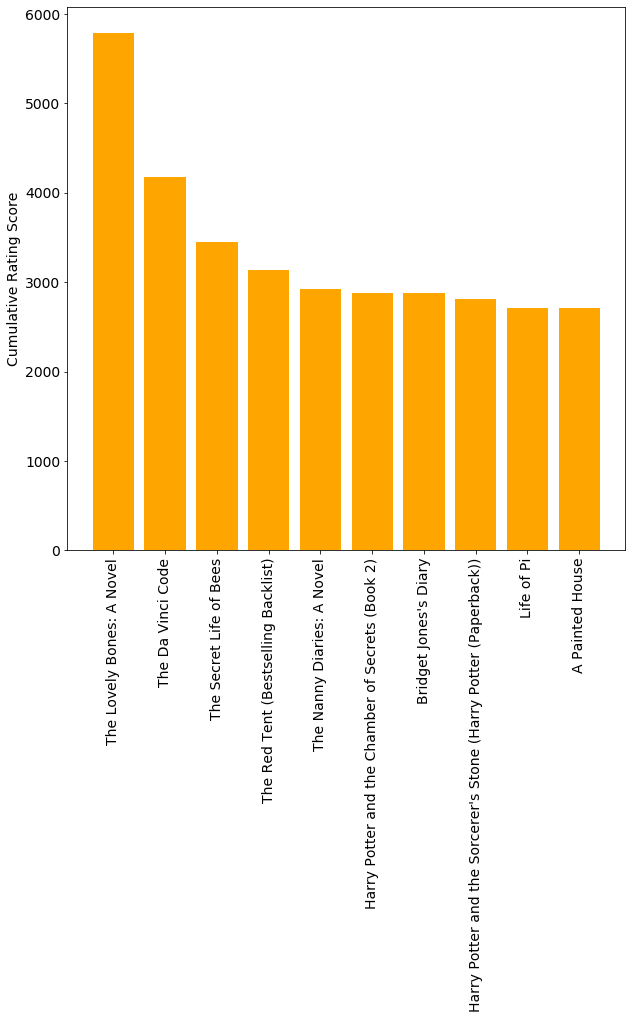

In [82]:
#  Plot books with highest cumulative book rating values.
cum_ratings = books_ratings_merge.groupby('title').rating.sum()
cum_ratings = cum_ratings.sort_values(ascending=False)[:10]
# to get sorted list of book titles
index = cum_ratings.index.tolist() 
# to get corresponding cummulative ratings values
values = cum_ratings.values.tolist() 
# plot
plt.rc("font", size=14)
plt.bar(range(len(index)), values, color='orange')
plt.xticks(range(len(index)), index, rotation='vertical')
plt.ylabel('Cumulative Rating Score')
plt.show()


We can see the most liked/rated book being a Novel.There are 2 novels on the list including some Harry potter books being a favorite among users its seems.

In [83]:
# Merge users df to books_ratings_merge and display df shape
print('Books dataframe size:', dfbooks.shape)
print('Explicit ratings dataframe size:', explicit_ratings.shape)
print('Users dataframe size:', dfusers.shape)
book_merge = books_ratings_merge.join(dfusers.set_index('userID'), on='userID')
print('book_merge(books,ratings & user)dataframe size:', book_merge.shape)

Books dataframe size: (271360, 5)
Explicit ratings dataframe size: (69426, 3)
Users dataframe size: (278856, 3)
book_merge(books,ratings & user)dataframe size: (1031136, 9)


In [84]:
# Return the list of Books with the lowest rating:
book_merge[book_merge.rating == book_merge.rating.min()]

,userID,ISBN,rating,title,author,yearOfPublication,publisher,age,country
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002.0,Ballantine Books,34,usa
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996.0,Warner Books,16,australia
5,276733,2080674722,0,Les Particules Elementaires,Michel Houellebecq,1998.0,Flammarion,37,france
10,276746,0425115801,0,Lightning,Dean R. Koontz,1996.0,Berkley Publishing Group,34,
11,276746,0449006522,0,Manhattan Hunt Club,JOHN SAUL,2002.0,Ballantine Books,34,
...,...,...,...,...,...,...,...,...,...
1149769,276704,059032120X,0,Sarah Bishop,Scott Odell,1994.0,Scholastic Inc,34,usa
1149770,276704,0679752714,0,A Desert of Pure Feeling (Vintage Contemporaries),Judith Freeman,1997.0,Vintage Books USA,34,usa
1149772,276704,080410526X,0,All I Really Need to Know,ROBERT FULGHUM,1989.0,Ivy Books,34,usa
1149774,276704,0876044011,0,Edgar Cayce on the Akashic Records: The Book o...,Kevin J. Todeschi,1998.0,A.R.E. Press (Association of Research &amp; Enlig,34,usa


In [85]:
# Because the plan is to work only with the explicit ratings, we will remove the implicit ratings 
explicit_ratings_books = book_merge[book_merge.rating != 0]

In [86]:
# Converting datatype for yearOfPublication column to int32
explicit_ratings_books.yearOfPublication = explicit_ratings_books.yearOfPublication.astype(np.int32)

In [95]:
explicit_ratings_books.sample(5)

,userID,ISBN,rating,title,author,yearOfPublication,publisher,age,country
809612,196502,0743421922,5,Look to Windward,Iain M. Banks,2002,Star Trek,38,usa
411881,98428,8495501252,8,Entrevista con el vampiro,Anne Rice,2000,Santillana USA Publishing Company,23,spain
635738,153662,0553569910,10,The Ugly Duckling,Iris Johansen,1997,Bantam Books,44,usa
455046,109357,0743225406,8,The Shipping News : A Novel,Annie Proulx,2001,Scribner,34,belgium
1030099,246311,0805054537,9,This Side of Brightness,Colum McCann,1999,Picador USA,35,usa


In [88]:
# Checking for any missing values
explicit_ratings_books.isnull().sum()

userID               0
ISBN                 0
rating               0
title                0
author               1
yearOfPublication    0
publisher            0
age                  0
country              0
dtype: int64

In [89]:
explicit_ratings_books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383842 entries, 1 to 1149778
Data columns (total 9 columns):
userID               383842 non-null int64
ISBN                 383842 non-null object
rating               383842 non-null int64
title                383842 non-null object
author               383841 non-null object
yearOfPublication    383842 non-null int32
publisher            383842 non-null object
age                  383842 non-null int32
country              383842 non-null object
dtypes: int32(2), int64(2), object(5)
memory usage: 26.4+ MB


In [90]:
explicit_ratings_books.shape

(383842, 9)

In [91]:
#save final processed data to csv
explicit_ratings_books.to_csv(r'../data/processed/explicit_ratings_books.csv', index = None, header=True) 